In [1]:
import pickle
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy
import matplotlib.animation as animation
import pandas as pd
import time
import itertools

In [2]:
sigma=1

In [3]:
def calculate_network_performance(G):
    # sd = dict(nx.shortest_path_length(G))

    if(len(G)==0):
        return 0
    
    gc_size = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)][0]
    return gc_size


def plot_functionality_ratio(failure_performance):
    plt.figure(figsize=(10, 5))
    steps = list(range(1, len(failure_performance) + 1))
    plt.plot(steps, failure_performance, marker='o', linestyle='-', color='blue')
    plt.title('Network Functionality Ratio During Failure')
    plt.xlabel('Step (Order of Node Failure)')
    plt.ylabel('Network Functionality Ratio')
    plt.grid(True)
    plt.show()

# FAILURE PROCESS

# Load Ashish Graphs

In [4]:
# df1=pd.read_csv(r"C:\Users\orije\Urban-Rail-Network-Resilience-Failure-Recovery-\Boston_MBTA\Edge_CSV.csv")
# edge_list_W = list(zip(df1['Source'], df1['Target']))
# agg_G = nx.Graph()
# agg_G.add_edges_from(edge_list_W)

## Load Comms physics graphs

In [5]:
# Load the graph from the pickle file
with open(rf"C:\Users\orije\recoverability\spaces\L\L-Cairo.pkl", 'rb') as file:
    bos_G = pickle.load(file)
import networkx as nx



# Manually create an undirected graph
agg_G = nx.Graph()
agg_G.add_nodes_from(bos_G.nodes(data=True))
# Add edges to the undirected graph
for u, v in bos_G.edges():
    if not agg_G.has_edge(u, v) and not agg_G.has_edge(v, u):
        agg_G.add_edge(u, v)

In [6]:
G=copy.deepcopy(agg_G)

In [7]:
def print_first_three_nodes_and_edges(G):
    # First 3 nodes
    print("First 3 Nodes and their features:")
    for node, data in list(G.nodes(data=True))[:3]:
        print(f"Node: {node}, Features: {data}")

    # First 3 edges
    print("\nFirst 3 Edges and their features:")
    for u, v, data in list(G.edges(data=True))[:3]:
        print(f"Edge: ({u}, {v}), Features: {data}")

In [8]:
print_first_three_nodes_and_edges(G)

First 3 Nodes and their features:
Node: 0, Features: {'lat': 29.848824, 'lon': 31.334252, 'name': 'Helwan', 'original_ids': [1, 62]}
Node: 1, Features: {'lat': 29.862604, 'lon': 31.325026, 'name': 'Ain Helwan', 'original_ids': [2, 63]}
Node: 2, Features: {'lat': 29.8694521, 'lon': 31.3200045, 'name': 'Helwan University', 'original_ids': [3, 64]}

First 3 Edges and their features:
Edge: (0, 1), Features: {}
Edge: (1, 2), Features: {}
Edge: (2, 3), Features: {}


# Degree Failure

Initial perfr is :  61
Functionality after removing node 0: 1
Functionality after removing node 1: 0.5409836065573771
Functionality after removing node 2: 0.29508196721311475
Functionality after removing node 3: 0.29508196721311475
Functionality after removing node 4: 0.26229508196721313
Functionality after removing node 5: 0.2459016393442623
Functionality after removing node 6: 0.22950819672131148
Functionality after removing node 7: 0.21311475409836064
Functionality after removing node 8: 0.21311475409836064
Functionality after removing node 9: 0.21311475409836064
Functionality after removing node 10: 0.21311475409836064
Functionality after removing node 11: 0.21311475409836064
Functionality after removing node 12: 0.21311475409836064
Functionality after removing node 13: 0.21311475409836064
Functionality after removing node 14: 0.21311475409836064
Functionality after removing node 15: 0.21311475409836064
Functionality after removing node 16: 0.21311475409836064
Functionality after r

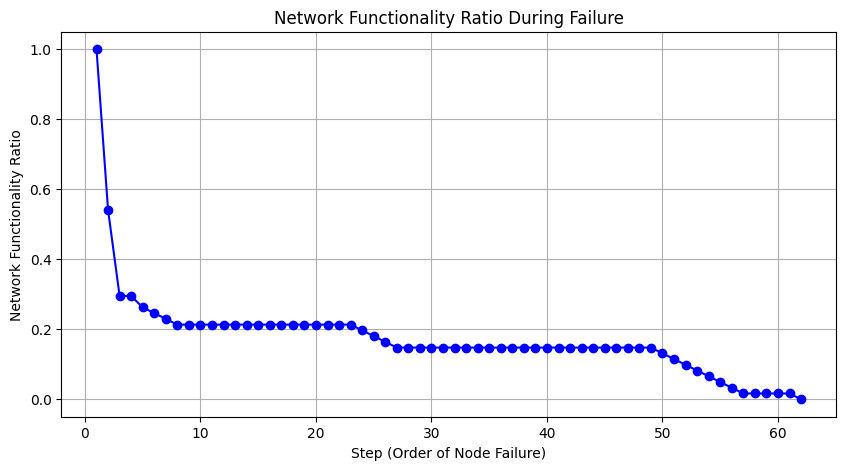

In [195]:
def simulate_failure_degree(G, sigma):
    H = copy.deepcopy(G)
    
    # Calculate the number of nodes to remove based on sigma percentage
    num_nodes_to_remove = int(sigma * len(G.nodes))
    seq_removed_degree=[]
    failure_performance = []
    initial_performance = calculate_network_performance(G)
    print("Initial perfr is : ", initial_performance)
    nodes_sorted_by_degree = sorted(G.nodes, key=lambda n: G.degree[n], reverse=True)[:num_nodes_to_remove]
    failure_performance.append(1)
    print(f'Functionality after removing node 0: {1}')
    i = 1
    for node in nodes_sorted_by_degree:
        # Remove the node and its edges
        if node in H.nodes:
            H.remove_node(node)
            seq_removed_degree.append(node)
        
        # Calculate the current performance and functionality ratio
        current_performance = calculate_network_performance(H)
        functionality_ratio = current_performance / initial_performance
        failure_performance.append(functionality_ratio)
        # visualize_graph_with_geo_coords(H)
        print(f'Functionality after removing node {i}: {functionality_ratio}')
        i += 1
    
    return failure_performance, seq_removed_degree


start_time=time.time()
failure_performance_degree, seq_removed_degree = simulate_failure_degree(agg_G, sigma)
end_time=time.time()
time_taken_degree=end_time-start_time
plot_functionality_ratio(failure_performance_degree)


# Betweeness Failure

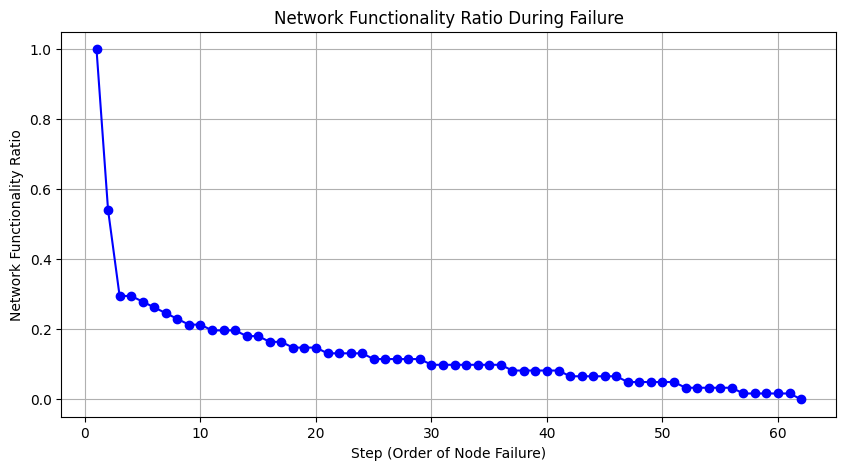

Time taken for betweenness-based failure: 0.010625839233398438 seconds


In [196]:
def simulate_failure_betweenness(G, sigma):
    H = copy.deepcopy(G)
    
    num_nodes_to_remove = int(sigma * len(G.nodes))
    failure_performance = []
    seq_removed_betweenness = []
    initial_performance = calculate_network_performance(G)
    
    betweenness_centrality = nx.betweenness_centrality(G)
    nodes_sorted_by_betweenness = sorted(G.nodes, key=lambda n: betweenness_centrality[n], reverse=True)[:num_nodes_to_remove]
    
    failure_performance.append(1)
    i = 1
    for node in nodes_sorted_by_betweenness:
        if node in H.nodes:
            H.remove_node(node)
            seq_removed_betweenness.append(node)
        
        current_performance = calculate_network_performance(H)
        functionality_ratio = current_performance / initial_performance
        failure_performance.append(functionality_ratio)
        # print(f'Functionality after removing node {i}: {functionality_ratio}')
        i += 1
    
    return failure_performance, seq_removed_betweenness


start_time = time.time()
failure_performance_betweenness,seq_removed_betweenness  = simulate_failure_betweenness(agg_G, sigma)
end_time = time.time()
time_taken_betweenness = end_time - start_time
plot_functionality_ratio(failure_performance_betweenness)
print(f'Time taken for betweenness-based failure: {time_taken_betweenness} seconds')

# Greedy Failure

Initial performance is:  61
Number of remaining nodes are 61
Functionality after removing node 1: 0.5409836065573771
Number of remaining nodes are 60
Functionality after removing node 2: 0.29508196721311475
Number of remaining nodes are 59
Functionality after removing node 3: 0.21311475409836064
Number of remaining nodes are 58
Functionality after removing node 4: 0.21311475409836064
Number of remaining nodes are 57
Functionality after removing node 5: 0.21311475409836064
Number of remaining nodes are 56
Functionality after removing node 6: 0.21311475409836064
Number of remaining nodes are 55
Functionality after removing node 7: 0.21311475409836064
Number of remaining nodes are 54
Functionality after removing node 8: 0.21311475409836064
Number of remaining nodes are 53
Functionality after removing node 9: 0.21311475409836064
Number of remaining nodes are 52
Functionality after removing node 10: 0.21311475409836064
Number of remaining nodes are 51
Functionality after removing node 11: 0

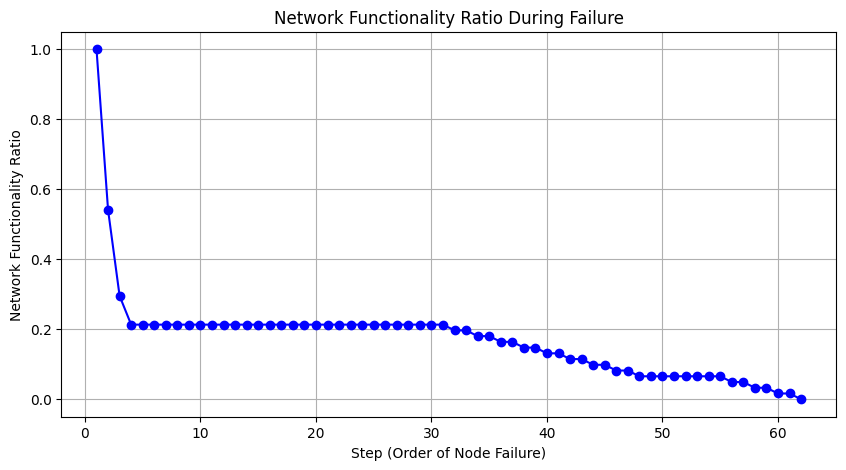

In [197]:
def simulate_failure_greedy(G, sigma):
    H = copy.deepcopy(G)
    
    # Calculate the number of nodes to remove based on sigma percentage
    num_nodes_to_remove = int(sigma * len(G.nodes))
    
    failure_performance = []
    seq_removed_greedy = []
    initial_performance = calculate_network_performance(G)
    print("Initial performance is: ", initial_performance)
    
    remaining_nodes = set(H.nodes)
    
    failure_performance.append(1)
    i = 1
    while len(remaining_nodes) > len(G.nodes) - num_nodes_to_remove:
        print("Number of remaining nodes are", len(remaining_nodes))
        worst_performance = float('inf')
        worst_node = None

        # Test failure for each remaining node
        for node in remaining_nodes:
            test_graph = copy.deepcopy(H)
            if node in test_graph:
                test_graph.remove_node(node)

            # Calculate performance if this node were removed
            test_performance = calculate_network_performance(test_graph)
            if test_performance <= worst_performance:
                worst_performance = test_performance
                worst_node = node
        
        # Remove the worst node from H for real
        if worst_node is not None:
            H.remove_node(worst_node)
            seq_removed_greedy.append(worst_node)
            functionality_ratio = worst_performance / initial_performance
            failure_performance.append(functionality_ratio)
            print(f'Functionality after removing node {i}: {functionality_ratio}')
            remaining_nodes.remove(worst_node)
            i += 1
    
    return failure_performance, seq_removed_greedy

# Example usage:
start_time = time.time()
failure_performance_greedy, seq_removed_greedy = simulate_failure_greedy(agg_G, sigma)
end_time = time.time()
time_taken_greedy = end_time - start_time
plot_functionality_ratio(failure_performance_greedy)


# Random

In [198]:
def simulate_failure_random(G, sigma):
    H = copy.deepcopy(G)
    
    num_nodes_to_remove = int(sigma * len(G.nodes))
    failure_performance = []
    seq_removed_random = []
    initial_performance = calculate_network_performance(G)
    
    nodes_randomly_selected = np.random.choice(G.nodes, num_nodes_to_remove, replace=False)
    
    failure_performance.append(1)
    i = 1
    for node in nodes_randomly_selected:
        if node in H.nodes:
            H.remove_node(node)
            seq_removed_random.append(node)
        
        current_performance = calculate_network_performance(H)
        functionality_ratio = current_performance / initial_performance
        failure_performance.append(functionality_ratio)
        print(f'Functionality after removing node {i}: {functionality_ratio}')
        i += 1
    
    return failure_performance, seq_removed_random


Functionality after removing node 1: 0.9508196721311475
Functionality after removing node 2: 0.9180327868852459
Functionality after removing node 3: 0.6229508196721312
Functionality after removing node 4: 0.6229508196721312
Functionality after removing node 5: 0.4918032786885246
Functionality after removing node 6: 0.4262295081967213
Functionality after removing node 7: 0.4262295081967213
Functionality after removing node 8: 0.2786885245901639
Functionality after removing node 9: 0.2786885245901639
Functionality after removing node 10: 0.2459016393442623
Functionality after removing node 11: 0.2459016393442623
Functionality after removing node 12: 0.21311475409836064
Functionality after removing node 13: 0.16393442622950818
Functionality after removing node 14: 0.16393442622950818
Functionality after removing node 15: 0.16393442622950818
Functionality after removing node 16: 0.14754098360655737
Functionality after removing node 17: 0.09836065573770492
Functionality after removing node 

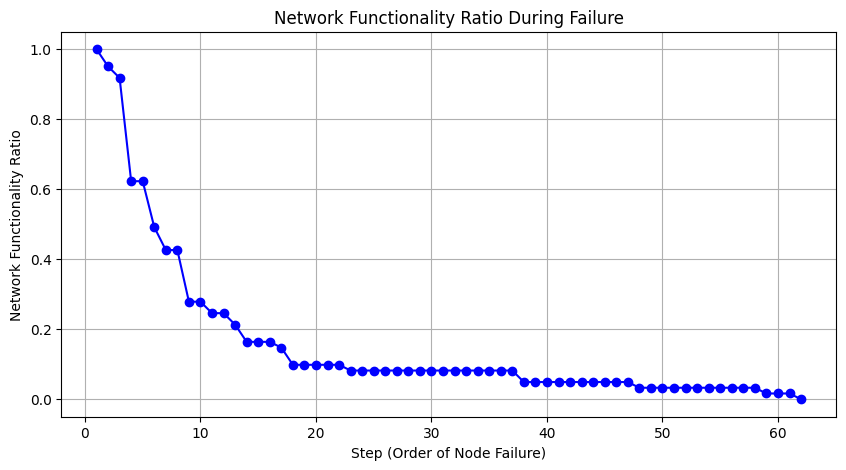

Time taken for random-based failure: 0.005003452301025391 seconds


In [199]:
start_time = time.time()
failure_performance_random, seq_removed_random = simulate_failure_random(agg_G, sigma)
end_time = time.time()
time_taken_random = end_time - start_time
plot_functionality_ratio(failure_performance_random)
print(f'Time taken for random-based failure: {time_taken_random} seconds')


# Eigen Vector

In [200]:
def simulate_failure_eigen(G, sigma):
    H = copy.deepcopy(G)
    
    num_nodes_to_remove = int(sigma * len(G.nodes))
    failure_performance = []
    initial_performance = calculate_network_performance(G)
    seq_removed_eigen=[]

    try:
        eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=5000, tol=1e-06)
    except nx.PowerIterationFailedConvergence:
        print("Eigenvector centrality failed to converge, trying with a random start vector.")
        nstart = {n: 1 for n in G.nodes()}  # Start with equal centrality assumption
        eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=500, tol=1e-06, nstart=nstart)
    
    nodes_sorted_by_eigenvector = sorted(G.nodes, key=lambda n: eigenvector_centrality[n], reverse=True)[:num_nodes_to_remove]
    
    failure_performance.append(1)
    i = 1
    for node in nodes_sorted_by_eigenvector:
        if node in H.nodes:
            H.remove_node(node)
            seq_removed_eigen.append(node)
        current_performance = calculate_network_performance(H)
        functionality_ratio = current_performance / initial_performance
        failure_performance.append(functionality_ratio)
        print(f'Functionality after removing node {i}: {functionality_ratio}')
        i += 1
    
    return failure_performance, seq_removed_eigen


Functionality after removing node 1: 0.6557377049180327
Functionality after removing node 2: 0.29508196721311475
Functionality after removing node 3: 0.29508196721311475
Functionality after removing node 4: 0.29508196721311475
Functionality after removing node 5: 0.29508196721311475
Functionality after removing node 6: 0.29508196721311475
Functionality after removing node 7: 0.29508196721311475
Functionality after removing node 8: 0.29508196721311475
Functionality after removing node 9: 0.2786885245901639
Functionality after removing node 10: 0.2786885245901639
Functionality after removing node 11: 0.2786885245901639
Functionality after removing node 12: 0.2786885245901639
Functionality after removing node 13: 0.2786885245901639
Functionality after removing node 14: 0.26229508196721313
Functionality after removing node 15: 0.26229508196721313
Functionality after removing node 16: 0.26229508196721313
Functionality after removing node 17: 0.26229508196721313
Functionality after removing 

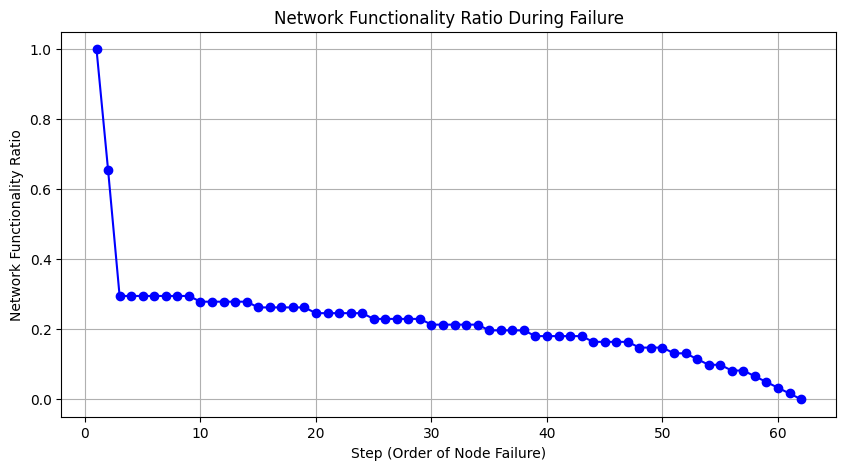

Time taken for eigenvector-based failure: 0.012995481491088867 seconds


In [201]:
start_time = time.time()
failure_performance_eigen, seq_removed_eigen = simulate_failure_eigen(agg_G, sigma)
end_time = time.time()
time_taken_eigen = end_time - start_time
plot_functionality_ratio(failure_performance_eigen)
print(f'Time taken for eigenvector-based failure: {time_taken_eigen} seconds')


# Closeness

In [202]:
def simulate_failure_closeness(G, sigma):
    H = copy.deepcopy(G)
    
    num_nodes_to_remove = int(sigma * len(G.nodes))
    failure_performance = []
    initial_performance = calculate_network_performance(G)
    seq_removed_closeness=[]
    closeness_centrality = nx.closeness_centrality(G)
    nodes_sorted_by_closeness = sorted(G.nodes, key=lambda n: closeness_centrality[n], reverse=True)[:num_nodes_to_remove]
    
    failure_performance.append(1)
    i = 1
    for node in nodes_sorted_by_closeness:
        if node in H.nodes:
            H.remove_node(node)
            seq_removed_closeness.append(node)
        
        current_performance = calculate_network_performance(H)
        functionality_ratio = current_performance / initial_performance
        failure_performance.append(functionality_ratio)
        print(f'Functionality after removing node {i}: {functionality_ratio}')
        i += 1
    
    return failure_performance, seq_removed_closeness


Functionality after removing node 1: 0.8524590163934426
Functionality after removing node 2: 0.8360655737704918
Functionality after removing node 3: 0.3770491803278688
Functionality after removing node 4: 0.29508196721311475
Functionality after removing node 5: 0.29508196721311475
Functionality after removing node 6: 0.29508196721311475
Functionality after removing node 7: 0.2786885245901639
Functionality after removing node 8: 0.2786885245901639
Functionality after removing node 9: 0.2786885245901639
Functionality after removing node 10: 0.2786885245901639
Functionality after removing node 11: 0.26229508196721313
Functionality after removing node 12: 0.26229508196721313
Functionality after removing node 13: 0.2459016393442623
Functionality after removing node 14: 0.2459016393442623
Functionality after removing node 15: 0.2459016393442623
Functionality after removing node 16: 0.2459016393442623
Functionality after removing node 17: 0.2459016393442623
Functionality after removing node 1

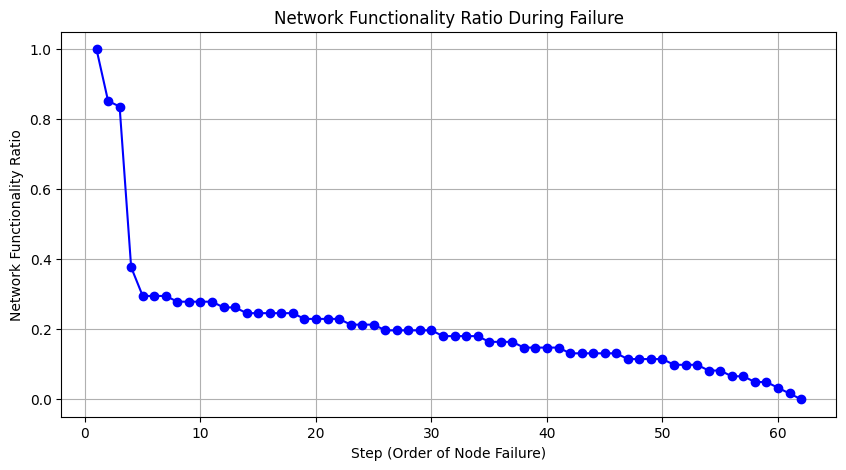

Time taken for closeness-based failure: 0.008515596389770508 seconds


In [203]:
start_time = time.time()
failure_performance_closeness, seq_removed_closeness = simulate_failure_closeness(agg_G, sigma)
end_time = time.time()
time_taken_closeness = end_time - start_time
plot_functionality_ratio(failure_performance_closeness)
print(f'Time taken for closeness-based failure: {time_taken_closeness} seconds')


# DomiRank Failure

Initial performance is:  61
Functionality after removing node 1: 0.5409836065573771
Functionality after removing node 2: 0.29508196721311475
Functionality after removing node 3: 0.29508196721311475
Functionality after removing node 4: 0.29508196721311475
Functionality after removing node 5: 0.29508196721311475
Functionality after removing node 6: 0.29508196721311475
Functionality after removing node 7: 0.26229508196721313
Functionality after removing node 8: 0.26229508196721313
Functionality after removing node 9: 0.26229508196721313
Functionality after removing node 10: 0.22950819672131148
Functionality after removing node 11: 0.22950819672131148
Functionality after removing node 12: 0.22950819672131148
Functionality after removing node 13: 0.22950819672131148
Functionality after removing node 14: 0.22950819672131148
Functionality after removing node 15: 0.22950819672131148
Functionality after removing node 16: 0.22950819672131148
Functionality after removing node 17: 0.19672131147540

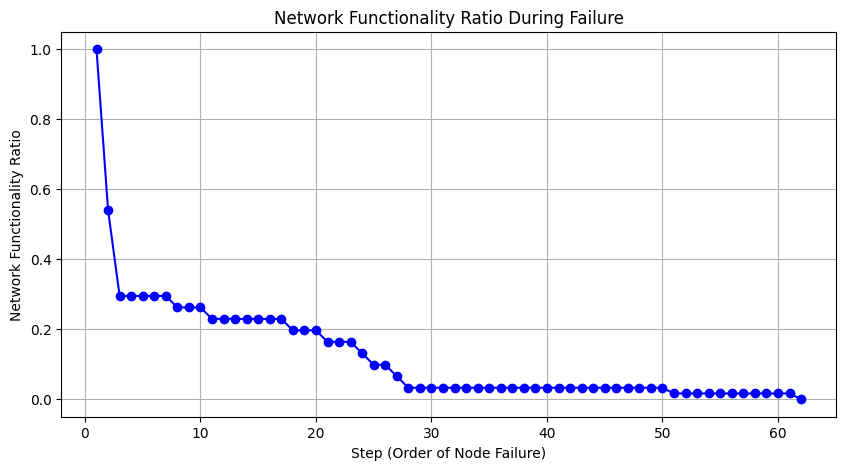

Time taken for DomiRank-based failure: 0.009253978729248047 seconds


In [204]:
import copy
import numpy as np
import networkx as nx
import time

def domirank(G, sigma=-1, dt=0.1, epsilon=1e-5, maxIter=1000, checkStep=10):
    if isinstance(G, nx.Graph):  # Check if it is a NetworkX graph
        G = nx.to_scipy_sparse_array(G)  # Convert to scipy sparse array if it is a graph
    else:
        G = G.copy()
    if sigma == -1:
        sigma = optimal_sigma(G, dt=dt, epsilon=epsilon, maxIter=maxIter, checkStep=checkStep)
    pGAdj = sigma * G.astype(np.float32)
    Psi = np.zeros(pGAdj.shape[0]).astype(np.float32)
    maxVals = np.zeros(int(maxIter / checkStep)).astype(np.float32)
    dt = np.float32(dt)
    j = 0
    boundary = epsilon * pGAdj.shape[0] * dt
    for i in range(maxIter):
        tempVal = ((pGAdj @ (1 - Psi)) - Psi) * dt
        Psi += tempVal.real
        if i % checkStep == 0:
            if np.abs(tempVal).sum() < boundary:
                break
            maxVals[j] = tempVal.max()
            if i == 0:
                initialChange = maxVals[j]
            if j > 0:
                if maxVals[j] > maxVals[j - 1] and maxVals[j - 1] > maxVals[j - 2]:
                    return False, Psi
            j += 1

    return True, Psi

def find_eigenvalue(G, minVal=0, maxVal=1, maxDepth=100, dt=0.1, epsilon=1e-5, maxIter=100, checkStep=10):
    x = (minVal + maxVal) / G.sum(axis=-1).max()
    minValStored = 0
    for i in range(maxDepth):
        if maxVal - minVal < epsilon:
            break
        if domirank(G, x, dt, epsilon, maxIter, checkStep)[0]:
            minVal = x
            x = (minVal + maxVal) / 2
            minValStored = minVal
        else:
            maxVal = (x + maxVal) / 2
            x = (minVal + maxVal) / 2
        if minVal == 0:
            print(f'Current Interval : [-inf, -{1 / maxVal}]')
        else:
            print(f'Current Interval : [-{1 / minVal}, -{1 / maxVal}]')
    finalVal = (maxVal + minVal) / 2
    return -1 / finalVal

def process_iteration(q, i, sigma, spArray, maxIter, checkStep, dt, epsilon, sampling):
    tf, domiDist = domirank(spArray, sigma, dt=dt, epsilon=epsilon, maxIter=maxIter, checkStep=checkStep)
    domiAttack = generate_attack(domiDist)
    ourTempAttack, __ = network_attack_sampled(spArray, domiAttack, sampling=sampling)
    finalErrors = ourTempAttack.sum()
    q.put(finalErrors)

def optimal_sigma(spArray, endVal=0, startval=0.000001, iterationNo=100, dt=0.1, epsilon=1e-5, maxIter=100, checkStep=10, maxDepth=100, sampling=0):
    if endVal == 0:
        endVal = find_eigenvalue(spArray, maxDepth=maxDepth, dt=dt, epsilon=epsilon, maxIter=maxIter, checkStep=checkStep)
    import multiprocessing as mp
    endval = -0.9999 / endVal
    tempRange = np.arange(startval, endval + (endval - startval) / iterationNo, (endval - startval) / iterationNo)
    processes = []
    q = mp.Queue()
    for i, sigma in enumerate(tempRange):
        p = mp.Process(target=process_iteration, args=(q, i, sigma, spArray, maxIter, checkStep, dt, epsilon, sampling))
        p.start()
        processes.append(p)

    results = []
    for p in processes:
        p.join()
        result = q.get()
        results.append(result)
    finalErrors = np.array(results)
    minEig = np.where(finalErrors == finalErrors.min())[0][-1]
    minEig = tempRange[minEig]
    return minEig, finalErrors
optimal_sigma_value = 0.26

def simulate_failure_domirank(G, sigma, alpha=0.85, beta=0.1, theta=1.0):
    H = copy.deepcopy(G)
    
    num_nodes_to_remove = int(sigma * len(G.nodes))
    failure_performance = []
    seq_removed_domirank=[]
    initial_performance = calculate_network_performance(G)
    print("Initial performance is: ", initial_performance)

    converged, domirank_centrality = domirank(nx.to_scipy_sparse_array(G), sigma=optimal_sigma_value)
    if not converged:
        print("Warning: DomiRank calculation did not converge. Results may be inaccurate.")

    # Mapping nodes to their DomiRank centrality values
    domirank_dict = {node: domirank_centrality[i] for i, node in enumerate(G.nodes)}

    nodes_sorted_by_domirank = sorted(G.nodes, key=lambda n: domirank_dict[n], reverse=True)[:num_nodes_to_remove]
    
    failure_performance.append(1)
    i = 1
    for node in nodes_sorted_by_domirank:
        if node in H.nodes:
            H.remove_node(node)
            seq_removed_domirank.append(node)
        current_performance = calculate_network_performance(H)
        functionality_ratio = current_performance / initial_performance
        failure_performance.append(functionality_ratio)
        print(f'Functionality after removing node {i}: {functionality_ratio}')
        i += 1
    
    return failure_performance, seq_removed_domirank

# Assuming agg_G and sigma are defined and calculate_network_performance and plot_functionality_ratio are defined functions
start_time = time.time()
failure_performance_domirank, seq_removed_domirank = simulate_failure_domirank(agg_G, sigma)
end_time = time.time()
time_taken_domirank = end_time - start_time

plot_functionality_ratio(failure_performance_domirank)

print(f'Time taken for DomiRank-based failure: {time_taken_domirank} seconds')


# Dynamic DomiRank

In [91]:
# def domirank(G, sigma=-1, dt=0.1, epsilon=1e-5, maxIter=1000, checkStep=10):
#     if isinstance(G, nx.Graph):  # Check if it is a NetworkX graph
#         G = nx.to_scipy_sparse_array(G)  # Convert to scipy sparse array if it is a graph
#     else:
#         G = G.copy()
#     if sigma == -1:
#         sigma = optimal_sigma(G, dt=dt, epsilon=epsilon, maxIter=maxIter, checkStep=checkStep)
#     pGAdj = sigma * G.astype(np.float32)
#     Psi = np.zeros(pGAdj.shape[0]).astype(np.float32)
#     maxVals = np.zeros(int(maxIter / checkStep)).astype(np.float32)
#     dt = np.float32(dt)
#     j = 0
#     boundary = epsilon * pGAdj.shape[0] * dt
#     for i in range(maxIter):
#         tempVal = ((pGAdj @ (1 - Psi)) - Psi) * dt
#         Psi += tempVal.real
#         if i % checkStep == 0:
#             change = np.abs(tempVal).sum()
#             if change < boundary:
#                 break
#             maxVals[j] = tempVal.max()
#             if i == 0:
#                 initialChange = maxVals[j]
#             if j > 1 and maxVals[j] > maxVals[j - 1] and maxVals[j - 1] > maxVals[j - 2]:
#                 return False, Psi
#             j += 1

#     return True, Psi

# def calculate_domirank(G, alpha=0.85, beta=0.1, theta=1.0):
#     A = nx.to_numpy_array(G)
#     N = A.shape[0]
#     Gamma = np.zeros(N)
#     for _ in range(1000):  # max_iter=1000
#         Gamma_new = Gamma + beta * (alpha * A.dot(theta - Gamma) - Gamma)
#         if np.linalg.norm(Gamma_new - Gamma, ord=1) < 1e-6:  # tol=1e-6
#             break
#         Gamma = Gamma_new
#     return dict(zip(G.nodes(), Gamma))


# def simulate_failure_dynamic_domirank(G, sigma, alpha=0.85, beta=0.1, theta=1.0):
#     H = copy.deepcopy(G)
    
#     num_nodes_to_remove = int(sigma * len(G.nodes))
#     failure_performance = []
#     initial_performance = calculate_network_performance(G)
#     print("Initial performance is: ", initial_performance)
#     seq_removed_dynamic_domirank = []
#     remaining_nodes = set(H.nodes)
    
#     failure_performance.append(1)
#     i = 1
#     while len(remaining_nodes) > len(G.nodes) - num_nodes_to_remove:
#         print("Number of remaining nodes are", len(remaining_nodes))
        
#         # Recalculate DomiRank centrality for the remaining nodes
#         domirank_centrality = calculate_domirank(H, alpha, beta, theta)
#         nodes_sorted_by_domirank = sorted(remaining_nodes, key=lambda n: domirank_centrality.get(n, -np.inf), reverse=True)
        
#         worst_node = nodes_sorted_by_domirank[0]

#         # Remove the worst node from H
#         if worst_node is not None:
#             H.remove_node(worst_node)
#             seq_removed_dynamic_domirank.append(worst_node)
#             functionality_ratio = calculate_network_performance(H) / initial_performance
#             failure_performance.append(functionality_ratio)
#             print(f'Functionality after removing node {i}: {functionality_ratio}')
#             remaining_nodes.remove(worst_node)
#             i += 1
    
#     return failure_performance, seq_removed_dynamic_domirank



# start_time = time.time()
# failure_performance_dynamic_domirank, seq_removed_dynamic_domirank = simulate_failure_dynamic_domirank(agg_G, sigma)
# end_time = time.time()
# time_taken_dynamic_domirank = end_time - start_time

# plot_functionality_ratio(failure_performance_dynamic_domirank)

# print(f'Time taken for Dynamic DomiRank-based failure: {time_taken_dynamic_domirank} seconds')
# plot_area_failure(failure_performance_dynamic_domirank, "Dynamic Domi Rank")


# Dynamic Degree

Initial performance is:  61
Number of remaining nodes are 61
Functionality after removing node 1: 0.7049180327868853
Number of remaining nodes are 60
Functionality after removing node 2: 0.639344262295082
Number of remaining nodes are 59
Functionality after removing node 3: 0.2459016393442623
Number of remaining nodes are 58
Functionality after removing node 4: 0.2459016393442623
Number of remaining nodes are 57
Functionality after removing node 5: 0.2459016393442623
Number of remaining nodes are 56
Functionality after removing node 6: 0.2459016393442623
Number of remaining nodes are 55
Functionality after removing node 7: 0.2459016393442623
Number of remaining nodes are 54
Functionality after removing node 8: 0.2459016393442623
Number of remaining nodes are 53
Functionality after removing node 9: 0.21311475409836064
Number of remaining nodes are 52
Functionality after removing node 10: 0.21311475409836064
Number of remaining nodes are 51
Functionality after removing node 11: 0.2131147

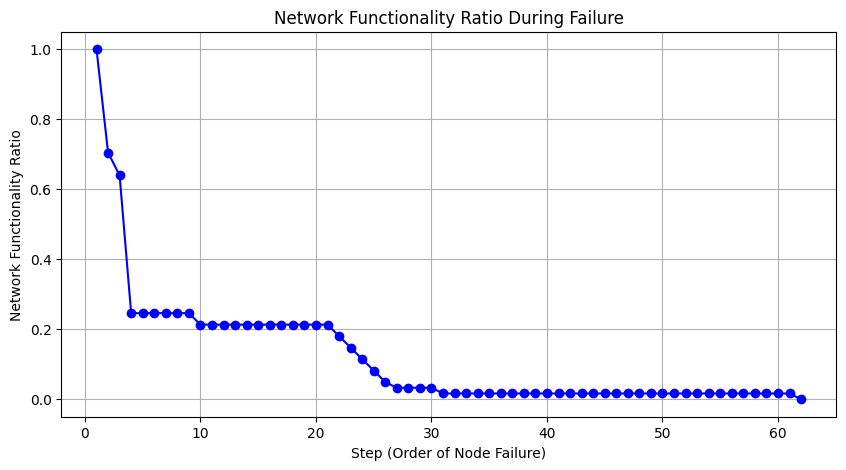

Time taken for Dynamic Degree-based failure: 0.003000020980834961 seconds


In [140]:
def simulate_failure_dynamic_degree(G, sigma):
    H = copy.deepcopy(G)
    
    num_nodes_to_remove = int(sigma * len(G.nodes))
    failure_performance = []
    seq_removed_dynamic_degree = []
    initial_performance = calculate_network_performance(G)
    print("Initial performance is: ", initial_performance)
    
    remaining_nodes = set(H.nodes)
    
    failure_performance.append(1)
    i = 1
    while len(remaining_nodes) > len(G.nodes) - num_nodes_to_remove:
        print("Number of remaining nodes are", len(remaining_nodes))
        
        # Recalculate degree centrality for the remaining nodes
        degree_centrality = H.degree
        nodes_sorted_by_degree = sorted(remaining_nodes, key=lambda n: degree_centrality[n], reverse=True)
        
        worst_node = nodes_sorted_by_degree[0]

        # Remove the worst node from H
        if worst_node is not None:
            H.remove_node(worst_node)
            seq_removed_dynamic_degree.append(worst_node)
            functionality_ratio = calculate_network_performance(H) / initial_performance
            failure_performance.append(functionality_ratio)
            print(f'Functionality after removing node {i}: {functionality_ratio}')
            remaining_nodes.remove(worst_node)
            i += 1
    
    return failure_performance, seq_removed_dynamic_degree


start_time = time.time()
failure_performance_dynamic_degree, seq_removed_dynamic_degree = simulate_failure_dynamic_degree(agg_G, sigma)
end_time = time.time()
time_taken_dynamic_degree = end_time - start_time

plot_functionality_ratio(failure_performance_dynamic_degree)

print(f'Time taken for Dynamic Degree-based failure: {time_taken_dynamic_degree} seconds')


# Dynamic Betweeneness

Initial performance is:  61
Number of remaining nodes are 61
Functionality after removing node 1: 0.5737704918032787
Number of remaining nodes are 60
Functionality after removing node 2: 0.2786885245901639
Number of remaining nodes are 59
Functionality after removing node 3: 0.2459016393442623
Number of remaining nodes are 58
Functionality after removing node 4: 0.21311475409836064
Number of remaining nodes are 57
Functionality after removing node 5: 0.16393442622950818
Number of remaining nodes are 56
Functionality after removing node 6: 0.11475409836065574
Number of remaining nodes are 55
Functionality after removing node 7: 0.11475409836065574
Number of remaining nodes are 54
Functionality after removing node 8: 0.11475409836065574
Number of remaining nodes are 53
Functionality after removing node 9: 0.09836065573770492
Number of remaining nodes are 52
Functionality after removing node 10: 0.09836065573770492
Number of remaining nodes are 51
Functionality after removing node 11: 0.0

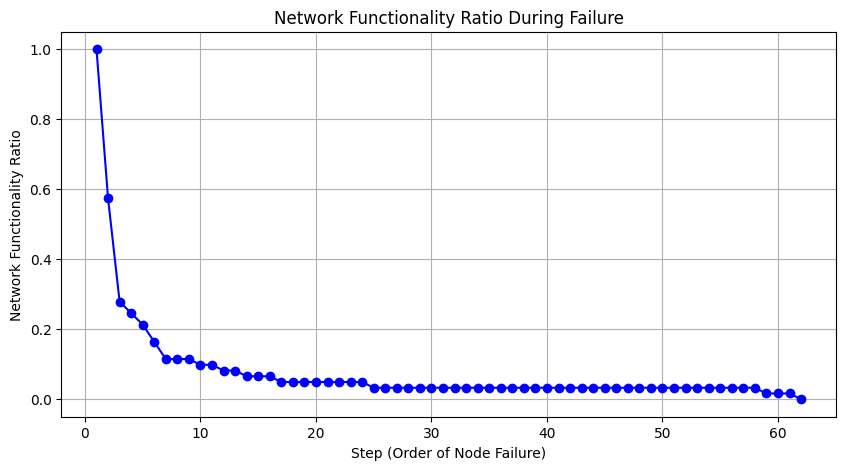

Time taken for Dynamic Betweenness-based failure: 0.03200864791870117 seconds


In [141]:
def simulate_failure_dynamic_betweenness(G, sigma):
    H = copy.deepcopy(G)
    
    num_nodes_to_remove = int(sigma * len(G.nodes))
    failure_performance = []
    initial_performance = calculate_network_performance(G)
    print("Initial performance is: ", initial_performance)
    seq_removed_dynamic_betweenness=[]
    remaining_nodes = set(H.nodes)
    
    failure_performance.append(1)
    i = 1
    while len(remaining_nodes) > len(G.nodes) - num_nodes_to_remove:
        print("Number of remaining nodes are", len(remaining_nodes))
        
        # Recalculate betweenness centrality for the remaining nodes
        betweenness_centrality = nx.betweenness_centrality(H)
        nodes_sorted_by_betweenness = sorted(remaining_nodes, key=lambda n: betweenness_centrality[n], reverse=True)
        
        worst_node = nodes_sorted_by_betweenness[0]

        # Remove the worst node from H
        if worst_node is not None:
            H.remove_node(worst_node)
            seq_removed_dynamic_betweenness.append(worst_node)
            functionality_ratio = calculate_network_performance(H) / initial_performance
            failure_performance.append(functionality_ratio)
            print(f'Functionality after removing node {i}: {functionality_ratio}')
            remaining_nodes.remove(worst_node)
            i += 1
    
    return failure_performance, seq_removed_dynamic_betweenness


start_time = time.time()
failure_performance_dynamic_betweenness, seq_removed_dynamic_betweenness = simulate_failure_dynamic_betweenness(agg_G, sigma)
end_time = time.time()
time_taken_dynamic_betweenness = end_time - start_time

plot_functionality_ratio(failure_performance_dynamic_betweenness)

print(f'Time taken for Dynamic Betweenness-based failure: {time_taken_dynamic_betweenness} seconds')


# Dynamic Eigen

Initial performance is:  61
Number of remaining nodes are 61
Functionality after removing node 1: 0.8032786885245902
Number of remaining nodes are 60
Functionality after removing node 2: 0.5081967213114754
Number of remaining nodes are 59
Functionality after removing node 3: 0.2459016393442623
Number of remaining nodes are 58
Functionality after removing node 4: 0.21311475409836064
Number of remaining nodes are 57
Functionality after removing node 5: 0.16393442622950818
Number of remaining nodes are 56
Functionality after removing node 6: 0.11475409836065574
Number of remaining nodes are 55
Functionality after removing node 7: 0.11475409836065574
Number of remaining nodes are 54
Functionality after removing node 8: 0.11475409836065574
Number of remaining nodes are 53
Functionality after removing node 9: 0.11475409836065574
Number of remaining nodes are 52
Functionality after removing node 10: 0.09836065573770492
Number of remaining nodes are 51
Functionality after removing node 11: 0.0

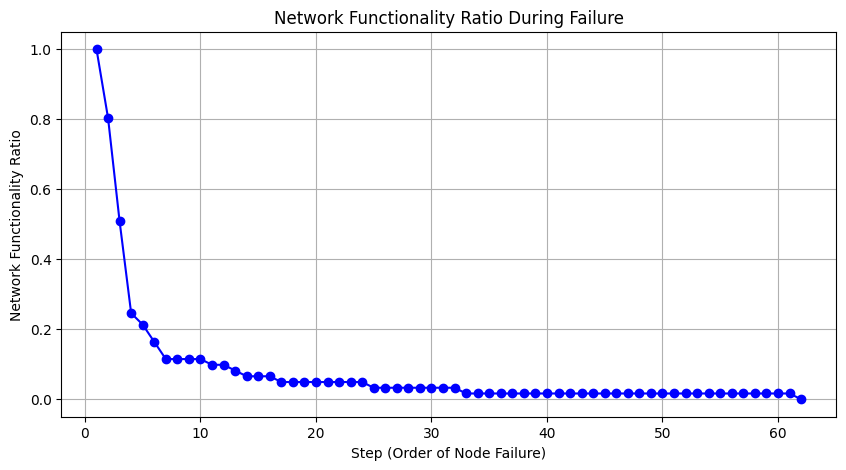

In [142]:
def simulate_failure_dynamic_eigen(G, sigma):
    H = copy.deepcopy(G)
    
    num_nodes_to_remove = int(sigma * len(G.nodes))
    failure_performance = []
    seq_removed_dynamic_eigen = []
    initial_performance = calculate_network_performance(G)
    print("Initial performance is: ", initial_performance)
    
    remaining_nodes = set(H.nodes)
    
    failure_performance.append(1)
    i = 1
    while len(remaining_nodes) > len(G.nodes) - num_nodes_to_remove:
        print("Number of remaining nodes are", len(remaining_nodes))
        
        try:
            eigen_centrality = nx.eigenvector_centrality(H, max_iter=5000, tol=1e-06)
        except nx.PowerIterationFailedConvergence:
            print("Eigenvector centrality failed to converge, trying with a random start vector.")
            nstart = {n: 1 for n in H.nodes()}  # Start with equal centrality assumption
            eigen_centrality = nx.eigenvector_centrality(H, max_iter=500, tol=1e-06, nstart=nstart)
            
        nodes_sorted_by_eigen = sorted(remaining_nodes, key=lambda n: eigen_centrality[n], reverse=True)
        
        worst_node = nodes_sorted_by_eigen[0]

        # Remove the worst node from H
        if worst_node is not None:
            H.remove_node(worst_node)
            seq_removed_dynamic_eigen.append(worst_node)
            functionality_ratio = calculate_network_performance(H) / initial_performance
            failure_performance.append(functionality_ratio)
            print(f'Functionality after removing node {i}: {functionality_ratio}')
            remaining_nodes.remove(worst_node)
            i += 1
    
    return failure_performance, seq_removed_dynamic_eigen


start_time = time.time()
failure_performance_dynamic_eigen, seq_removed_dynamic_eigen = simulate_failure_dynamic_eigen(agg_G, sigma)
end_time = time.time()
time_taken_dynamic_eigen = end_time - start_time

plot_functionality_ratio(failure_performance_dynamic_eigen)


# Dynamic Closeness

Initial performance is:  61
Number of remaining nodes are 61
Functionality after removing node 1: 0.8032786885245902
Number of remaining nodes are 60
Functionality after removing node 2: 0.3770491803278688
Number of remaining nodes are 59
Functionality after removing node 3: 0.2459016393442623
Number of remaining nodes are 58
Functionality after removing node 4: 0.2459016393442623
Number of remaining nodes are 57
Functionality after removing node 5: 0.18032786885245902
Number of remaining nodes are 56
Functionality after removing node 6: 0.16393442622950818
Number of remaining nodes are 55
Functionality after removing node 7: 0.11475409836065574
Number of remaining nodes are 54
Functionality after removing node 8: 0.11475409836065574
Number of remaining nodes are 53
Functionality after removing node 9: 0.11475409836065574
Number of remaining nodes are 52
Functionality after removing node 10: 0.11475409836065574
Number of remaining nodes are 51
Functionality after removing node 11: 0.08

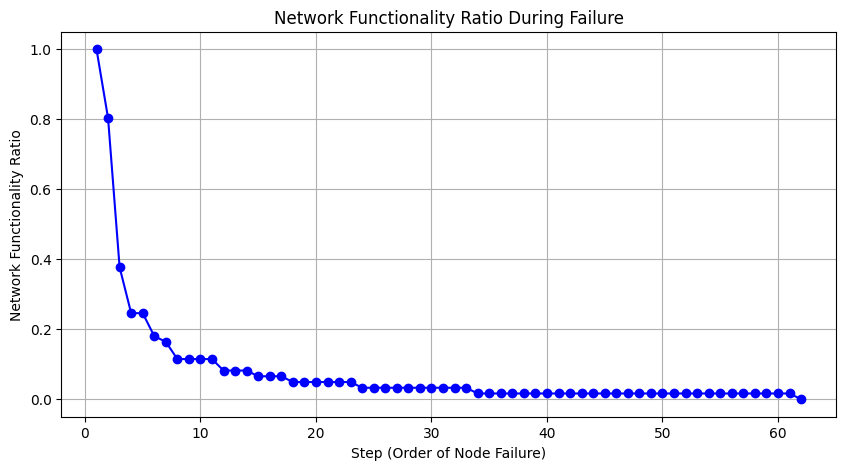

In [143]:
def simulate_failure_dynamic_closeness(G, sigma):
    H = copy.deepcopy(G)
    
    num_nodes_to_remove = int(sigma * len(G.nodes))
    failure_performance = []
    seq_removed_closeness = []
    initial_performance = calculate_network_performance(G)
    print("Initial performance is: ", initial_performance)
    
    remaining_nodes = set(H.nodes)
    
    failure_performance.append(1)
    i = 1
    while len(remaining_nodes) > len(G.nodes) - num_nodes_to_remove:
        print("Number of remaining nodes are", len(remaining_nodes))
        
        # Recalculate closeness centrality for the remaining nodes
        closeness_centrality = nx.closeness_centrality(H)
        nodes_sorted_by_closeness = sorted(remaining_nodes, key=lambda n: closeness_centrality[n], reverse=True)
        
        worst_node = nodes_sorted_by_closeness[0]

        # Remove the worst node from H
        if worst_node is not None:
            H.remove_node(worst_node)
            seq_removed_closeness.append(worst_node)
            functionality_ratio = calculate_network_performance(H) / initial_performance
            failure_performance.append(functionality_ratio)
            print(f'Functionality after removing node {i}: {functionality_ratio}')
            remaining_nodes.remove(worst_node)
            i += 1
    
    return failure_performance, seq_removed_closeness


start_time = time.time()
failure_performance_dynamic_closeness, seq_removed_dynamic_closeness = simulate_failure_dynamic_closeness(agg_G, sigma)
end_time = time.time()
time_taken_dynamic_closeness = end_time - start_time

plot_functionality_ratio(failure_performance_dynamic_closeness)


## Flood Failure

In [144]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import folium
import networkx as nx
from pyproj import CRS

# Load the node data from CSV
node_data = pd.read_csv('Boston_MBTA/Node_CSV.csv')

# Convert node data to GeoDataFrame using Lat and Lon columns
node_data['geometry'] = node_data.apply(lambda row: Point(row['Lat'], row['Lon']), axis=1)
nodes_gdf = gpd.GeoDataFrame(node_data, geometry='geometry')

# Load the river geometry from the provided shapefile
shapefile_path = 'Charles Mystic Malden Chelsea River BosHarbor North Shore/HYDRO25K_Charles_Mystic_Malden_Chelsea_Harbor_NShore.shp'
river_gdf = gpd.read_file(shapefile_path)

# Ensure both GeoDataFrames use the same CRS
nodes_gdf = nodes_gdf.set_crs('EPSG:4326')
river_gdf = river_gdf.to_crs(nodes_gdf.crs)

# Project to a CRS that uses meters for distance calculation
crs_meters = CRS("EPSG:3857")
nodes_gdf_meters = nodes_gdf.to_crs(crs_meters)
river_gdf_meters = river_gdf.to_crs(crs_meters)

# Combine all river geometries into a single object if there are multiple features
river_geometry_meters = river_gdf_meters.unary_union

# Function to calculate the distance from a point to the river in meters
def calculate_distance_meters(point):
    return point.distance(river_geometry_meters)

# Apply the distance calculation to each node in meters
nodes_gdf_meters['distance_to_river_meters'] = nodes_gdf_meters['geometry'].apply(calculate_distance_meters)

# Convert distance from meters to miles (1 meter = 0.000621371 miles)
nodes_gdf['distance_to_river_miles'] = nodes_gdf_meters['distance_to_river_meters'] * 0.000621371

# Sort nodes based on the calculated distance and keep the original indices
nodes_gdf = nodes_gdf.sort_values(by='distance_to_river_miles')
nodes_gdf['rank'] = range(1, len(nodes_gdf) + 1)

# Print the distances of each node from the nearest river point in miles and their sequence
print("Node distances to the nearest river point (in miles):")
for index, row in nodes_gdf.iterrows():
    print(f"{row['Node']}, {row['distance_to_river_miles']:.2f} miles")

# Get the sorted index array
sorted_node_indices = nodes_gdf.index.tolist()
print("\nSorted node indices based on distance to the river:")
print(sorted_node_indices)

# Create a folium map centered around the average location of the nodes
center = [nodes_gdf.geometry.y.mean(), nodes_gdf.geometry.x.mean()]
m = folium.Map(location=center, zoom_start=12)

# Add the river geometry to the map
folium.GeoJson(river_gdf, name="River").add_to(m)

# Add the nodes to the map with their rank, distance, and name
for idx, row in nodes_gdf.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=10,  # Increase the size of the node
        color='red',
        fill=True,
        fill_color='red',
        popup=f'Node: {row.Node}, Rank: {row.rank}, Distance: {row.distance_to_river_miles:.2f} miles',
        tooltip=row.Node
    ).add_to(m)

    # Add the node name and distance as a DivIcon
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        icon=folium.DivIcon(html=f"""
            <div class="custom-div-icon" style="font-family: sans-serif; color: black; font-size: 6pt; font-weight: bold">
                {row.Node} ({row.distance_to_river_miles:.2f} miles)
            </div>""")
    ).add_to(m)

# JavaScript code to adjust text size based on zoom level
js = """
    function resizeText() {
        var zoom = map.getZoom();
        var elements = document.getElementsByClassName('custom-div-icon');
        for (var i = 0; i < elements.length; i++) {
            elements[i].style.fontSize = (zoom * 2) + 'px';
        }
    }
    map.on('zoomend', resizeText);
    resizeText();
"""

# Add JavaScript to the map
m.get_root().html.add_child(folium.Element(f"<script>{js}</script>"))

# Save the map to an HTML file
map_output_path = 'nodes_river_map.html'
m.save(map_output_path)

print(f"Map has been saved to {map_output_path}. Open it in a web browser to view.")


Node distances to the nearest river point (in miles):
Science Park, 0.05 miles
Aquarium, 0.07 miles
Revere Beach, 0.10 miles
Wellington, 0.12 miles
Assembly, 0.13 miles
Boston University West, 0.14 miles
Wonderland, 0.15 miles
Boston University Central, 0.16 miles
Boston University East, 0.17 miles
Lechmere, 0.17 miles
South Station, 0.17 miles
North Station, 0.17 miles
Charles/MGH, 0.18 miles
Maverick, 0.19 miles
Saint Paul Street(B), 0.20 miles
Suffolk Downs, 0.20 miles
Blandford Street, 0.21 miles
Kenmore, 0.21 miles
Broadway, 0.25 miles
Riverside, 0.25 miles
Orient Heights, 0.26 miles
Kendall/MIT, 0.27 miles
Pleasant Street, 0.29 miles
Wood Island, 0.31 miles
Beachmont, 0.36 miles
Harvard, 0.37 miles
Babcock Street, 0.40 miles
Hynes Convention Center, 0.42 miles
Malden Center, 0.43 miles
Community College, 0.43 miles
Waban, 0.45 miles
Sullivan Square, 0.46 miles
Copley, 0.46 miles
State, 0.47 miles
Haymarket, 0.49 miles
Tufts Medical Center, 0.49 miles
Arlington, 0.50 miles
Saint M

In [ ]:
def simulate_failure_flood(G, sigma):
    H = copy.deepcopy(G)
    
    num_nodes_to_remove = int(sigma * len(G.nodes))
    failure_performance = []
    seq_removed_flood = []
    initial_performance = calculate_network_performance(G)
    print("Initial performance is: ", initial_performance)
    
    remaining_nodes = set(H.nodes)
    
    failure_performance.append(1)
    i = 0
    while len(remaining_nodes) > len(G.nodes) - num_nodes_to_remove and i < len(sorted_node_indices):
        print("Number of remaining nodes are", len(remaining_nodes))
        # Select nodes based on their proximity to the Charles River
        node_to_remove = sorted_node_indices[i]
        # Remove the node from H
        if node_to_remove in H.nodes:
            H.remove_node(node_to_remove)
            seq_removed_flood.append(node_to_remove)
            functionality_ratio = calculate_network_performance(H) / initial_performance
            failure_performance.append(functionality_ratio)
            print(f'Functionality after removing node {i+1}: {functionality_ratio}')
            remaining_nodes.remove(node_to_remove)
            i += 1
        else:
            i += 1
    
    return failure_performance, seq_removed_flood


sigma=1

failure_performance_flood, seq_removed_flood = simulate_failure_flood(agg_G, sigma)

plot_functionality_ratio(failure_performance_flood)

print(f'Nodes removed in order: {seq_removed_flood}')


## Flood for Commps physics networks

In [3]:
#Visualtion of the network

In [32]:
import pickle

# Path to your pickle file
pickle_path = "C:/Users/orije/recoverability/spaces/L/L-SanFrancisco.pkl"

# Load the content from the pickle file
with open(pickle_path, 'rb') as file:
    data = pickle.load(file)

import folium

# Calculate the average latitude and longitude to center the map
average_lat = sum(node_data['lat'] for _, node_data in data.nodes(data=True)) / data.number_of_nodes()
average_lon = sum(node_data['lon'] for _, node_data in data.nodes(data=True)) / data.number_of_nodes()

# Create a map centered at the average location
m = folium.Map(location=[average_lat, average_lon], zoom_start=14)

# Add a marker for each node, including more attributes in the popup
for node, attr in data.nodes(data=True):
    # Format additional node attributes for the popup
    additional_info = f"Name: {attr.get('name', 'Unnamed')}<br>"
    additional_info += f"Lat: {attr['lat']}<br>Lon: {attr['lon']}<br>"
    if 'original_ids' in attr:
        additional_info += f"Original IDs: {attr['original_ids']}<br>"
    
    folium.Marker(
        [attr['lat'], attr['lon']],
        popup=folium.Popup(additional_info, max_width=200)  # Using folium.Popup to accommodate potentially long text
    ).add_to(m)

# Draw lines for edges (optional, as before)
for edge in data.edges():
    source_node, target_node = edge
    if source_node in data.nodes() and target_node in data.nodes():
        latlon_source = [data.nodes[source_node]['lat'], data.nodes[source_node]['lon']]
        latlon_target = [data.nodes[target_node]['lat'], data.nodes[target_node]['lon']]
        
        folium.PolyLine(locations=[latlon_source, latlon_target], color="blue", weight=2.5, opacity=1).add_to(m)

# Display the map
m


# Shapefile Link- 

SanFrancisco- "San Francisco/san_francisco_shapefile_2.shp"


In [205]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString
import folium
import networkx as nx
from pyproj import CRS

# Extract node features into a DataFrame
node_data = []
for node, data in G.nodes(data=True):
    node_data.append({'lat': data['lat'], 'lon': data['lon'], 'name': data['name'], 'original_ids': data['original_ids']})

node_data = pd.DataFrame(node_data)

# Convert node data to GeoDataFrame using Lat and Lon columns
node_data['geometry'] = node_data.apply(lambda row: Point(row['lon'], row['lat']), axis=1)
nodes_gdf = gpd.GeoDataFrame(node_data, geometry='geometry')

# Load the river geometry from the provided shapefile
shapefile_path = "San Francisco/san_francisco_shapefile_2.shp"
river_gdf = gpd.read_file(shapefile_path)

# Ensure the river GeoDataFrame has a CRS set
if river_gdf.crs is None:
    river_gdf = river_gdf.set_crs('EPSG:4326')  # You can adjust the EPSG code if necessary

# Ensure both GeoDataFrames use the same CRS
nodes_gdf = nodes_gdf.set_crs('EPSG:4326')
river_gdf = river_gdf.to_crs(nodes_gdf.crs)

# Project to a CRS that uses meters for distance calculation
crs_meters = CRS("EPSG:3857")
nodes_gdf_meters = nodes_gdf.to_crs(crs_meters)
river_gdf_meters = river_gdf.to_crs(crs_meters)

# Try to combine all river geometries into a single object if there are multiple features
try:
    river_geometry_meters = river_gdf_meters.unary_union
except Exception as e:
    print(f"Error encountered during unary_union: {e}")
    print("Attempting to clean and simplify geometries...")

    # Clean the geometries by applying a small buffer
    river_gdf_meters['geometry'] = river_gdf_meters['geometry'].buffer(0)

    # Simplify the geometries to reduce complexity
    river_gdf_meters['geometry'] = river_gdf_meters['geometry'].simplify(tolerance=0.01, preserve_topology=True)

    # Try the unary_union operation again
    try:
        river_geometry_meters = river_gdf_meters.unary_union
    except Exception as e:
        print(f"Failed to combine geometries after cleaning and simplifying: {e}")
        raise  # Re-raise the exception to stop execution if it still fails

# Function to calculate the distance from a point to the river in meters
def calculate_distance_meters(point):
    return point.distance(river_geometry_meters)

# Apply the distance calculation to each node in meters
nodes_gdf_meters['distance_to_river_meters'] = nodes_gdf_meters['geometry'].apply(calculate_distance_meters)

# Convert distance from meters to miles (1 meter = 0.000621371 miles)
nodes_gdf['distance_to_river_miles'] = nodes_gdf_meters['distance_to_river_meters'] * 0.000621371

# Sort nodes based on the calculated distance and keep the original indices
nodes_gdf = nodes_gdf.sort_values(by='distance_to_river_miles')
nodes_gdf['rank'] = range(1, len(nodes_gdf) + 1)

# Print the distances of each node from the nearest river point in miles and their sequence
print("Node distances to the nearest river point (in miles):")
for index, row in nodes_gdf.iterrows():
    print(f"{row['name']}, {row['distance_to_river_miles']:.2f} miles")

# Get the sorted index array
sorted_node_indices = nodes_gdf.index.tolist()
print("\nSorted node indices based on distance to the river:")
print(sorted_node_indices)

# Create a folium map centered around the average location of the nodes
center = [nodes_gdf.geometry.y.mean(), nodes_gdf.geometry.x.mean()]
m = folium.Map(location=center, zoom_start=12)

# Add the river geometry to the map
folium.GeoJson(river_gdf, name="River").add_to(m)

# Add the nodes to the map with their rank, distance, and name
for idx, row in nodes_gdf.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=7,  # Increase the size of the node
        color='red',
        fill=True,
        fill_color='red',
        popup=f'Node: {row["name"]}, Rank: {row["rank"]}, Distance: {row["distance_to_river_miles"]:.2f} miles',
        tooltip=row['name']
    ).add_to(m)

    # Add the node name and distance as a DivIcon
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        icon=folium.DivIcon(html=f"""
            <div class="custom-div-icon" style="font-family: sans-serif; color: black; font-size: 6pt; font-weight: bold">
                {row["name"]} ({row["distance_to_river_miles"]:.2f} miles)
            </div>""")
    ).add_to(m)

# Add the edges to the map
for u, v, data in G.edges(data=True):
    source_node = nodes_gdf.loc[nodes_gdf['name'] == G.nodes[u]['name']]
    target_node = nodes_gdf.loc[nodes_gdf['name'] == G.nodes[v]['name']]

    folium.PolyLine(
        locations=[(source_node.geometry.y.values[0], source_node.geometry.x.values[0]),
                   (target_node.geometry.y.values[0], target_node.geometry.x.values[0])],
        color='blue',
        weight=2,
        opacity=0.6
    ).add_to(m)

# JavaScript code to adjust text size based on zoom level
js = """
    function resizeText() {
        var zoom = map.getZoom();
        var elements = document.getElementsByClassName('custom-div-icon');
        for (var i = 0; i < elements.length; i++) {
            elements[i].style.fontSize = (zoom * 2) + 'px';
        }
    }
    map.on('zoomend', resizeText);
    resizeText();
"""

# Add JavaScript to the map
m.get_root().html.add_child(folium.Element(f"<script>{js}</script>"))

# Save the map to an HTML file
# map_output_path = 'water_maps_with_networks/Warsaw_flood_network.html'
# m.save(map_output_path)

print(f"Map has been saved to {map_output_path}. Open it in a web browser to view.")


Node distances to the nearest river point (in miles):
Opera, 0.13 miles
El-Zahraa', 0.21 miles
Sadat, 0.23 miles
Tora El-Balad, 0.25 miles
Mar Girgis, 0.26 miles
Mezallat, 0.27 miles
Sakanat El-Maadi, 0.29 miles
Kozzika, 0.30 miles
Khalafawy, 0.42 miles
Tora El-Asmant, 0.42 miles
El-Mounib, 0.43 miles
Kolleyyet El-Zeraa, 0.47 miles
Shubra El-Kheima, 0.50 miles
Dokki, 0.55 miles
Maadi, 0.55 miles
Saad Zaghloul, 0.56 miles
Nasser, 0.59 miles
El-Malek El-Saleh, 0.61 miles
Hadayek El-Maadi, 0.67 miles
Al-Sayeda Zeinab, 0.72 miles
Dar El-Salam, 0.73 miles
Sakiat Mekki, 0.79 miles
St. Teresa, 0.79 miles
El-Giza, 0.81 miles
Mohamed Naguib, 0.82 miles
Omm El-Misryeen, 0.84 miles
Orabi, 0.86 miles
Faisal, 0.94 miles
El-Maasara, 0.97 miles
Rod El Farag, 1.00 miles
Attaba, 1.14 miles
Cairo University, 1.18 miles
Bohooth, 1.24 miles
Al-Shohadaa, 1.25 miles
Masarra, 1.25 miles
Hadayek Helwan, 1.33 miles
Bab El-Shaaria, 1.76 miles
Wadi Hof, 1.79 miles
Helwan University, 2.01 miles
Ain Helwan, 2.19 m

## From World Sea shapefile (Athens)

## Polygon co-ordinates for body bodies

1. Athens: polygon_coords = [(23.3588782, 37.9481223 ), (23.9818065, 37.5103888), (24.3765149, 37.8901320 ), (23.9425228, 38.4438461)]

In [50]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import folium
import networkx as nx
from pyproj import CRS

# Define a polygon with four points to clip the river shapefile
polygon_coords = [(23.3588782, 37.9481223 ), (23.9818065, 37.5103888), (24.3765149, 37.8901320 ), (23.9425228, 38.4438461)]
clipping_polygon = gpd.GeoDataFrame([{'geometry': Polygon(polygon_coords)}], crs='EPSG:4326')

# Extract node features into a DataFrame
node_data = []
for node, data in G.nodes(data=True):
    node_data.append({'lat': data['lat'], 'lon': data['lon'], 'name': data['name'], 'original_ids': data['original_ids']})

node_data = pd.DataFrame(node_data)

# Convert node data to GeoDataFrame using Lat and Lon columns
node_data['geometry'] = node_data.apply(lambda row: Point(row['lon'], row['lat']), axis=1)
nodes_gdf = gpd.GeoDataFrame(node_data, geometry='geometry')

# Load the river geometry from the provided shapefile
shapefile_path = "Athens/World_EEZ_v12_20231025/World_EEZ_v12_20231025/eez_v12.shp"
river_gdf = gpd.read_file(shapefile_path)

# Ensure both GeoDataFrames use the same CRS
nodes_gdf = nodes_gdf.set_crs('EPSG:4326')
river_gdf = river_gdf.to_crs(nodes_gdf.crs)

# Clip the river shapefile to the area defined by the polygon
river_clipped_gdf = gpd.clip(river_gdf, clipping_polygon)

# Project to a CRS that uses meters for distance calculation
crs_meters = CRS("EPSG:3857")
nodes_gdf_meters = nodes_gdf.to_crs(crs_meters)
river_clipped_gdf_meters = river_clipped_gdf.to_crs(crs_meters)

# Combine all river geometries into a single object if there are multiple features
river_geometry_meters = river_clipped_gdf_meters.unary_union

# Function to calculate the distance from a point to the river in meters
def calculate_distance_meters(point):
    return point.distance(river_geometry_meters)

# Apply the distance calculation to each node in meters
nodes_gdf_meters['distance_to_river_meters'] = nodes_gdf_meters['geometry'].apply(calculate_distance_meters)

# Convert distance from meters to miles (1 meter = 0.000621371 miles)
nodes_gdf['distance_to_river_miles'] = nodes_gdf_meters['distance_to_river_meters'] * 0.000621371

# Sort nodes based on the calculated distance and keep the original indices
nodes_gdf = nodes_gdf.sort_values(by='distance_to_river_miles')
nodes_gdf['rank'] = range(1, len(nodes_gdf) + 1)

# Print the distances of each node from the nearest river point in miles and their sequence
print("Node distances to the nearest river point (in miles):")
for index, row in nodes_gdf.iterrows():
    print(f"{row['name']}, {row['distance_to_river_miles']:.2f} miles")

# Get the sorted index array
sorted_node_indices = nodes_gdf.index.tolist()
print("\nSorted node indices based on distance to the river:")
print(sorted_node_indices)

# Create a folium map centered around the average location of the nodes
center = [nodes_gdf.geometry.y.mean(), nodes_gdf.geometry.x.mean()]
m = folium.Map(location=center, zoom_start=12)

# Add the clipped river geometry to the map
folium.GeoJson(river_clipped_gdf, name="Clipped River").add_to(m)

# Add the nodes to the map with their rank, distance, and name
for idx, row in nodes_gdf.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=10,  # Increase the size of the node
        color='red',
        fill=True,
        fill_color='red',
        popup=f'Node: {row["name"]}, Rank: {row["rank"]}, Distance: {row["distance_to_river_miles"]:.2f} miles',
        tooltip=row['name']
    ).add_to(m)

    # Add the node name and distance as a DivIcon
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        icon=folium.DivIcon(html=f"""
            <div class="custom-div-icon" style="font-family: sans-serif; color: black; font-size: 6pt; font-weight: bold">
                {row["name"]} ({row["distance_to_river_miles"]:.2f} miles)
            </div>""")
    ).add_to(m)

# Add the edges to the map
for u, v, data in G.edges(data=True):
    source_node = nodes_gdf.loc[nodes_gdf['name'] == G.nodes[u]['name']]
    target_node = nodes_gdf.loc[nodes_gdf['name'] == G.nodes[v]['name']]

    folium.PolyLine(
        locations=[(source_node.geometry.y.values[0], source_node.geometry.x.values[0]),
                   (target_node.geometry.y.values[0], target_node.geometry.x.values[0])],
        color='blue',
        weight=2,
        opacity=0.6
    ).add_to(m)


# JavaScript code to adjust text size based on zoom level
js = """
    function resizeText() {
        var zoom = map.getZoom();
        var elements = document.getElementsByClassName('custom-div-icon');
        for (var i = 0; i < elements.length; i++) {
            elements[i].style.fontSize = (zoom * 2) + 'px';
        }
    }
    map.on('zoomend', resizeText);
    resizeText();
"""

# Add JavaScript to the map
m.get_root().html.add_child(folium.Element(f"<script>{js}</script>"))

# Save the map to an HTML file
map_output_path = 'nodes_river_map.html'
m.save(map_output_path)

print(f"Map has been saved to {map_output_path}. Open it in a web browser to view.")


Node distances to the nearest river point (in miles):
ΣΤ.ΠΕΙΡΑΙΑ, 0.10 miles
ΣΤ.Ν.ΦΑΛΗΡΟΥ, 0.38 miles
ΣΤ.ΜΟΣΧΑΤΟΥ, 1.25 miles
ΣΤ.ΕΛΛΗΝΙΚΟ, 1.69 miles
ΣΤ.ΑΡΓΥΡΟΥΠΟΛΗ, 1.88 miles
ΣΤ.ΚΑΛΛΙΘΕΑΣ, 2.05 miles
ΣΤ.ΑΛΙΜΟΣ, 2.18 miles
ΣΤ.ΕΛ.ΒΕΝΙΖΕΛΟΥ, 2.38 miles
ΣΤ.ΗΛΙΟΥΠΟΛΗ, 2.79 miles
ΣΤ.ΚΑΤΩ ΠΕΤΡΑΛΩΝΩΝ, 3.02 miles
ΣΤ.ΝΕΟΣ ΚΟΣΜΟΣ, 3.31 miles
ΣΤ.ΑΓ.ΔΗΜΗΤΡΙΟΣ-ΑΛ.ΠΑ/ΛΗΣ, 3.42 miles
ΣΤ.ΣΥΓΓΡΟΥ-ΦΙΞ, 3.56 miles
ΣΤ.ΑΓ.ΙΩΑΝΝΗΣ, 3.60 miles
ΣΤ.ΔΑΦΝΗΣ, 3.60 miles
ΣΤ.ΚΕΡΑΜΕΙΚΟΥ, 3.91 miles
ΣΤ.ΑΚΡΟΠΟΛΗ, 3.96 miles
ΣΤ.ΘΗΣΕΙΟΥ, 4.08 miles
ΣΤ.ΑΕΡΟΔΡΟΜΙΟΥ, 4.13 miles
ΣΤ.ΕΛΑΙΩΝΑΣ, 4.24 miles
ΣΤ.ΜΟΝΑΣΤΗΡΑΚΙ, 4.30 miles
ΣΤ.ΑΙΓΑΛΕΩ, 4.42 miles
ΣΤ.ΣΥΝΤΑΓΜΑΤΟΣ, 4.65 miles
ΣΤ.ΑΓ.ΜΑΡΙΝΑ, 4.68 miles
ΣΤ.ΜΕΤΑΞΟΥΡΓΕΙΟΥ, 4.78 miles
ΣΤ.ΠΑΝΕΠΙΣΤΗΜΙΟ, 4.86 miles
ΣΤ.ΟΜΟΝΟΙΑΣ, 4.92 miles
ΣΤ.ΛΑΡΙΣΗΣ, 5.25 miles
ΣΤ.ΕΥΑΓΓΕΛΙΣΜΟΥ, 5.31 miles
ΣΤ.ΒΙΚΤΩΡΙΑΣ, 5.65 miles
ΣΤ.ΜΕΓ.ΜΟΥΣΙΚΗΣ, 5.75 miles
ΣΤ.ΑΤΤΙΚΗΣ, 5.82 miles
ΣΤ.ΣΕΠΟΛΙΩΝ, 5.92 miles
ΣΤ.ΑΓ.ΑΝΤΩΝΙΟΣ, 5.93 miles
ΣΤ.ΑΝΘΟΥΠΟΛΗ, 6.13 miles
ΣΤ.ΠΕΡΙΣΤΕΡΙ, 6.42 miles
ΣΤ.ΑΜΠΕΛΟΚΗΠΩΝ, 6

## Failure simulation code

Initial performance is:  61
Number of remaining nodes are 61
Functionality after removing node 1: 0.8524590163934426
Number of remaining nodes are 60
Functionality after removing node 2: 0.6229508196721312
Number of remaining nodes are 59
Functionality after removing node 3: 0.5409836065573771
Number of remaining nodes are 58
Functionality after removing node 4: 0.5409836065573771
Number of remaining nodes are 57
Functionality after removing node 5: 0.5409836065573771
Number of remaining nodes are 56
Functionality after removing node 6: 0.4918032786885246
Number of remaining nodes are 55
Functionality after removing node 7: 0.4918032786885246
Number of remaining nodes are 54
Functionality after removing node 8: 0.4918032786885246
Number of remaining nodes are 53
Functionality after removing node 9: 0.47540983606557374
Number of remaining nodes are 52
Functionality after removing node 10: 0.47540983606557374
Number of remaining nodes are 51
Functionality after removing node 11: 0.475409

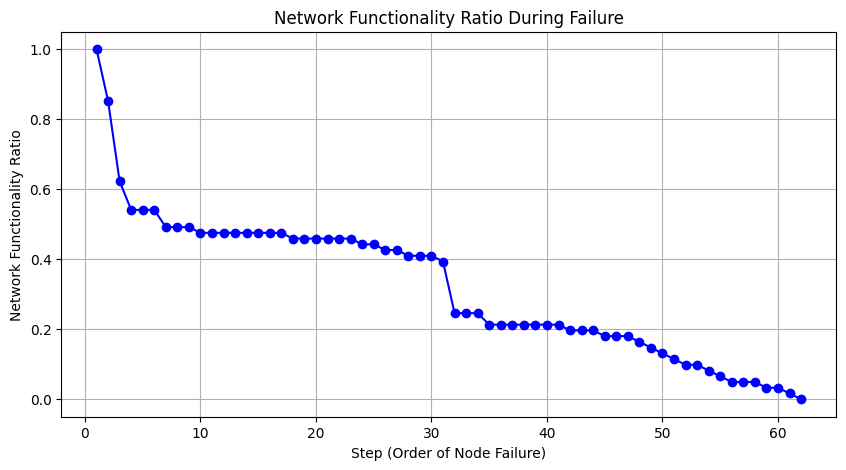

Nodes removed in order: [52, 13, 18, 8, 14, 46, 9, 7, 47, 6, 60, 45, 44, 53, 10, 17, 19, 15, 11, 16, 12, 59, 48, 57, 51, 58, 20, 56, 5, 49, 35, 55, 54, 21, 50, 4, 36, 3, 2, 1, 22, 37, 0, 23, 38, 39, 24, 25, 26, 27, 28, 40, 29, 30, 31, 41, 43, 32, 42, 33, 34]


In [206]:
def simulate_failure_flood(G, sigma):
    H = copy.deepcopy(G)
    
    num_nodes_to_remove = int(sigma * len(G.nodes))
    failure_performance = []
    seq_removed_flood = []
    initial_performance = calculate_network_performance(G)
    print("Initial performance is: ", initial_performance)
    
    remaining_nodes = set(H.nodes)
    
    failure_performance.append(1)
    i = 0
    while len(remaining_nodes) > len(G.nodes) - num_nodes_to_remove and i < len(sorted_node_indices):
        print("Number of remaining nodes are", len(remaining_nodes))
        # Select nodes based on their proximity to the Charles River
        node_to_remove = sorted_node_indices[i]
        # Remove the node from H
        if node_to_remove in H.nodes:
            H.remove_node(node_to_remove)
            seq_removed_flood.append(node_to_remove)
            functionality_ratio = calculate_network_performance(H) / initial_performance
            failure_performance.append(functionality_ratio)
            print(f'Functionality after removing node {i+1}: {functionality_ratio}')
            remaining_nodes.remove(node_to_remove)
            i += 1
        else:
            i += 1
    
    return failure_performance, seq_removed_flood


sigma=1

failure_performance_flood, seq_removed_flood = simulate_failure_flood(agg_G, sigma)

plot_functionality_ratio(failure_performance_flood)

print(f'Nodes removed in order: {seq_removed_flood}')


## Flood from Sites ashish sent

In [27]:
# import numpy as np

# import numpy as np

# def plot_area_failure(failure_performance, type):
#     # Scale the ratios between 0 and 1
#     max_ratio = max(failure_performance)
#     scaled_ratios = [ratio / max_ratio for ratio in failure_performance]

#     steps = list(range(1, len(scaled_ratios) + 1))
    
#     # Calculate the area using the trapezoidal rule
#     area = np.trapz(scaled_ratios, steps)
    
#     # Normalize the area between 0 and 1
#     normalized_area = 1- (area / len(scaled_ratios))
    
#     print(f'Normalized area under the {type} Failure curve: {normalized_area:.3f}')  # Print with two decimal places
    
# # Usage example:
# # failure_performance = ... (however you obtain this list)
# plot_area_failure(failure_performance_degree, "Degree")
# plot_area_failure(failure_performance_betweenness, "Betweenness")
# plot_area_failure(failure_performance_greedy, "Greedy")
# plot_area_failure(failure_performance_random, "Random")
# plot_area_failure(failure_performance_eigen, "Eigen")
# plot_area_failure(failure_performance_closeness, "Closeness")
# # plot_area_failure(failure_performance_domirank, "Domi Rank")
# # plot_area_failure(failure_performance_dynamic_domirank, "Dynamic Domi Rank")
# plot_area_failure(failure_performance_dynamic_degree, "Dynamic Degree")
# plot_area_failure(failure_performance_dynamic_betweenness, "Dynamic Betweeness")
# plot_area_failure(failure_performance_dynamic_eigen, "Dynamic Eigen")
# plot_area_failure(failure_performance_dynamic_closeness, "Dynamic Closeness Rank")


# print("-------------------------------------")

# print("Time taken in Degree Failure", time_taken_degree)
# print("Time taken in Betweenness Failure", time_taken_betweenness)
# print("Time taken in Greedy Failure", time_taken_greedy)
# print("Time taken in Random Failure", time_taken_random)
# print("Time taken in Eigen Failure", time_taken_eigen)
# print("Time taken in Closeness Failure", time_taken_closeness)
# print("Time taken in Domirank Failure", time_taken_domirank)
# print("Time taken in Dynamic Domirank Failure", time_taken_dynamic_domirank)
# print("Time taken in Dynamic Degree Failure", time_taken_dynamic_degree)
# print("Time taken in Dynamic Betweenness Failure", time_taken_dynamic_betweenness)
# print("Time taken in Dynamic Eigen Failure", time_taken_dynamic_eigen)
# print("Time taken in Dynamic Closeness Failure", time_taken_dynamic_closeness)

In [28]:
# print("Sequence of Nodes removed from the network")
# print("Degree: ", seq_removed_degree)
# print("Betweenness: ", seq_removed_betweenness)
# print("Greedy: ", seq_removed_greedy)
# print("Random: ", seq_removed_random)
# print("Eigenvector: ", seq_removed_eigen)
# print("Closeness: ", seq_removed_closeness)
# print("DomiRank: ", seq_removed_domirank)
# print("Dynamic DomiRank: ", seq_removed_dynamic_domirank)
# print("Dynamic Degree: ", seq_removed_dynamic_degree)
# print("Dynamic Betweenness: ", seq_removed_dynamic_betweenness)
# print("Dynamic Eigen: ", seq_removed_dynamic_eigen)
# print("Dynamic Closeness: ", seq_removed_dynamic_closeness)

In [29]:
# import matplotlib.pyplot as plt


# Plot the performance ratios
# plt.figure(figsize=(10, 6))
# plt.plot(failure_performance_greedy, label='Greedy Failure', marker='o')
# plt.plot(failure_performance_betweenness, label='Betweenness Failure', marker='o')
# plt.plot(failure_performance_eigen, label='Eigen Failure', marker='o')
# plt.plot(failure_performance_random, label='Random Failure', marker='o')
# plt.plot(failure_performance_degree, label='Degree Failure', marker='o')
# plt.plot(failure_performance_closeness, label='Closeness Failure', marker='o')
# plt.plot(failure_performance_domirank, label='Domirank Failure', marker='o')
# plt.plot(failure_performance_dynamic_domirank, label='Dynamic Domirank Failure', marker='o')
# plt.plot(failure_performance_dynamic_eigen, label='Dynamic Eigen Failure', marker='o')
# plt.plot(failure_performance_dynamic_degree, label='Dynamic Degree Failure', marker='o')
# plt.plot(failure_performance_dynamic_closeness, label='Dynamic Closeness Failure', marker='o')
# plt.plot(failure_performance_dynamic_betweenness, label='Dynamic Betweenness Failure', marker='o')

# Set labels and title
# plt.xlabel('Step (Order of Node Failure)')
# plt.ylabel('Network Functionality Ratio')
# plt.title('Performance of Different Failure Methods')
# plt.legend()

# # Show plot
# plt.grid(True)
# plt.show()


## Ahish Trial plots

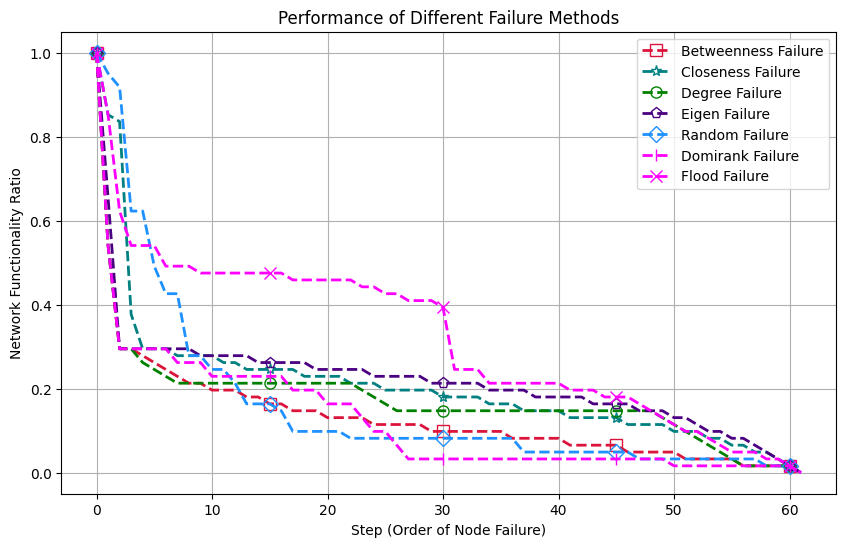

In [207]:
import matplotlib.pyplot as plt
colors = ['crimson', 'teal', 'green','indigo', 'dodgerblue', 'fuchsia']
Q = 2  # Assuming Q is your linewidth
marker_style = ['s', '*', 'o', 'p', 'D', 'x', '|']

# Plot the performance ratios
plt.figure(figsize=(10, 6))
plt.plot(failure_performance_betweenness, label='Betweenness Failure',color=colors[0], linestyle='--', marker=marker_style[0], markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.plot(failure_performance_closeness, label='Closeness Failure',color=colors[1], linestyle='--', marker=marker_style[1], markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.plot(failure_performance_degree, label='Degree Failure',color=colors[2], linestyle='--', marker=marker_style[2], markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.plot(failure_performance_eigen, label='Eigen Failure',color=colors[3], linestyle='--', marker=marker_style[3], markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.plot(failure_performance_random, label='Random Failure', color=colors[4], linestyle='--', marker=marker_style[4], markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.plot(failure_performance_domirank, label='Domirank Failure', color=colors[-1], linestyle='--', marker=marker_style[6], markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.plot(failure_performance_flood, label='Flood Failure', color=colors[5], linestyle='--', marker=marker_style[5], markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)

# plt.plot(failure_performance_greedy, label='Greedy Failure', marker='o')
# plt.plot(failure_performance_domirank, label='Domirank Failure', marker='o')
# plt.plot(failure_performance_dynamic_domirank, label='Dynamic Domirank Failure', marker='o')
# plt.plot(failure_performance_dynamic_eigen, label='Dynamic Eigen Failure', marker='o')
# plt.plot(failure_performance_dynamic_degree, label='Dynamic Degree Failure', marker='o')
# plt.plot(failure_performance_dynamic_closeness, label='Dynamic Closeness Failure', marker='o')
# plt.plot(failure_performance_dynamic_betweenness, label='Dynamic Betweenness Failure', marker='o')

# Set labels and title
plt.xlabel('Step (Order of Node Failure)')
plt.ylabel('Network Functionality Ratio')
plt.title('Performance of Different Failure Methods')
plt.legend()

# Show plot
plt.grid(True)
plt.savefig('failure_graphs/cairo.png', bbox_inches='tight')
plt.show()

In [208]:
def plot_area_failure(failure_performance, type):
    # Scale the ratios between 0 and 1
    max_ratio = max(failure_performance)
    scaled_ratios = [ratio / max_ratio for ratio in failure_performance]

    steps = list(range(1, len(scaled_ratios) + 1))
    
    # Calculate the area using the trapezoidal rule
    area = np.trapz(scaled_ratios, steps)
    
    # Normalize the area between 0 and 1
    normalized_area = (area / len(scaled_ratios))
    
    print(f'Normalized area under the {type} Failure curve: {normalized_area:.2f}')  # Print with two decimal places
    
# # Usage example:
# # failure_performance = ... (however you obtain this list)
plot_area_failure(failure_performance_domirank, "Domi Rank")
plot_area_failure(failure_performance_betweenness, "Betweenness")
plot_area_failure(failure_performance_degree, "Degree")
# plot_area_failure(failure_performance_greedy, "Greedy")
plot_area_failure(failure_performance_closeness, "Closeness")
plot_area_failure(failure_performance_eigen, "Eigen")
plot_area_failure(failure_performance_random, "Random")
plot_area_failure(failure_performance_flood, "Flood")
# # plot_area_failure(failure_performance_dynamic_domirank, "Dynamic Domi Rank")
# plot_area_failure(failure_performance_dynamic_degree, "Dynamic Degree")
# plot_area_failure(failure_performance_dynamic_betweenness, "Dynamic Betweeness")
# plot_area_failure(failure_performance_dynamic_eigen, "Dynamic Eigen")
# plot_area_failure(failure_performance_dynamic_closeness, "Dynamic Closeness Rank")

Normalized area under the Domi Rank Failure curve: 0.12
Normalized area under the Betweenness Failure curve: 0.13
Normalized area under the Degree Failure curve: 0.17
Normalized area under the Closeness Failure curve: 0.20
Normalized area under the Eigen Failure curve: 0.21
Normalized area under the Random Failure curve: 0.15
Normalized area under the Flood Failure curve: 0.31
